In [1]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils import shuffle

## Train same model as previous notebook

In [3]:
# Load simulated data: load complete training and validation sets.
np.random.seed(11)

# Training set should be one concatenated shuffled list of simulated examples
# Validation set similarly, but also keep information about simulation parameters
# to evaluate performance in specific simulation conditions.
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]
y, x = shuffle(
    np.concatenate([np.loadtxt(bounds_file) for bounds_file in bounds_files]),
    np.concatenate([np.loadtxt(intensities_file) for intensities_file in intensities_files])
)

In [4]:
def overlap_metric(y_true, y_predicted):
    y_pred_round = tf.round(y_predicted)
    max_start = tf.math.maximum(y_true[:, 0], y_pred_round[:, 0])
    min_end = tf.math.minimum(y_true[:, 1], y_pred_round[:,1])
    overlap = tf.math.maximum(0.0, min_end - max_start)
    longest_bounds = tf.math.maximum(
        y_true[:, 1] + 1 - y_true[:, 0], 
        y_pred_round[:, 1] + 1 - y_pred_round[:, 0]
        )
    return overlap / longest_bounds

In [5]:
model = tf.keras.Sequential([
        layers.Dense(40, activation='relu'),
        layers.Dense(2, activation='linear')
    ])
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
    loss='mse',
    metrics=['mae', overlap_metric]
    )

In [6]:
history = model.fit(x, y, epochs=1000, batch_size=8192, validation_split=0.33)

Train on 60299 samples, validate on 29701 samples
Epoch 1/1000
60299/60299 [==============================] - 1s 14us/step - loss: 5890.1017 - mean_absolute_error: 60.4742 - overlap_metric: 0.0170 - val_loss: 3375.4970 - val_mean_absolute_error: 49.3789 - val_overlap_metric: 0.0097
Epoch 2/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1629.1233 - mean_absolute_error: 31.8663 - overlap_metric: 0.0268 - val_loss: 1500.4686 - val_mean_absolute_error: 34.8766 - val_overlap_metric: 0.0118
Epoch 3/1000
60299/60299 [==============================] - 0s 1us/step - loss: 723.0474 - mean_absolute_error: 21.8587 - overlap_metric: 0.0387 - val_loss: 679.1847 - val_mean_absolute_error: 21.4011 - val_overlap_metric: 0.0276
Epoch 4/1000
60299/60299 [==============================] - 0s 1us/step - loss: 384.3332 - mean_absolute_error: 15.3115 - overlap_metric: 0.0651 - val_loss: 338.2285 - val_mean_absolute_error: 15.2241 - val_overlap_metric: 0.0556
Epoch 5/1000
60299/60299 

Epoch 37/1000
60299/60299 [==============================] - 0s 1us/step - loss: 14.1845 - mean_absolute_error: 2.9265 - overlap_metric: 0.3481 - val_loss: 14.0443 - val_mean_absolute_error: 2.9126 - val_overlap_metric: 0.3391
Epoch 38/1000
60299/60299 [==============================] - 0s 1us/step - loss: 13.8468 - mean_absolute_error: 2.8919 - overlap_metric: 0.3519 - val_loss: 13.6954 - val_mean_absolute_error: 2.8756 - val_overlap_metric: 0.3439
Epoch 39/1000
60299/60299 [==============================] - 0s 1us/step - loss: 13.5170 - mean_absolute_error: 2.8573 - overlap_metric: 0.3552 - val_loss: 13.3928 - val_mean_absolute_error: 2.8450 - val_overlap_metric: 0.3454
Epoch 40/1000
60299/60299 [==============================] - 0s 1us/step - loss: 13.2347 - mean_absolute_error: 2.8274 - overlap_metric: 0.3569 - val_loss: 13.0521 - val_mean_absolute_error: 2.8086 - val_overlap_metric: 0.3634
Epoch 41/1000
60299/60299 [==============================] - 0s 1us/step - loss: 12.9221 - m

60299/60299 [==============================] - 0s 1us/step - loss: 8.2021 - mean_absolute_error: 2.2325 - overlap_metric: 0.4339 - val_loss: 8.1567 - val_mean_absolute_error: 2.2263 - val_overlap_metric: 0.4423
Epoch 74/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.1352 - mean_absolute_error: 2.2229 - overlap_metric: 0.4367 - val_loss: 8.0976 - val_mean_absolute_error: 2.2174 - val_overlap_metric: 0.4269
Epoch 75/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.0676 - mean_absolute_error: 2.2137 - overlap_metric: 0.4368 - val_loss: 8.0175 - val_mean_absolute_error: 2.2070 - val_overlap_metric: 0.4403
Epoch 76/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.0027 - mean_absolute_error: 2.2054 - overlap_metric: 0.4388 - val_loss: 8.0020 - val_mean_absolute_error: 2.2065 - val_overlap_metric: 0.4505
Epoch 77/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.9638 - mean_absolute_error: 2.2

60299/60299 [==============================] - 0s 1us/step - loss: 6.7778 - mean_absolute_error: 2.0295 - overlap_metric: 0.4675 - val_loss: 6.7270 - val_mean_absolute_error: 2.0209 - val_overlap_metric: 0.4611
Epoch 110/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.7169 - mean_absolute_error: 2.0197 - overlap_metric: 0.4694 - val_loss: 6.6965 - val_mean_absolute_error: 2.0167 - val_overlap_metric: 0.4626
Epoch 111/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.6861 - mean_absolute_error: 2.0151 - overlap_metric: 0.4702 - val_loss: 6.6833 - val_mean_absolute_error: 2.0141 - val_overlap_metric: 0.4607
Epoch 112/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.6616 - mean_absolute_error: 2.0110 - overlap_metric: 0.4709 - val_loss: 6.6485 - val_mean_absolute_error: 2.0090 - val_overlap_metric: 0.4653
Epoch 113/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.6420 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 6.0759 - mean_absolute_error: 1.9186 - overlap_metric: 0.4876 - val_loss: 6.0374 - val_mean_absolute_error: 1.9122 - val_overlap_metric: 0.4927
Epoch 146/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0479 - mean_absolute_error: 1.9135 - overlap_metric: 0.4885 - val_loss: 6.0454 - val_mean_absolute_error: 1.9127 - val_overlap_metric: 0.4805
Epoch 147/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0758 - mean_absolute_error: 1.9188 - overlap_metric: 0.4866 - val_loss: 6.0421 - val_mean_absolute_error: 1.9141 - val_overlap_metric: 0.4764
Epoch 148/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0262 - mean_absolute_error: 1.9107 - overlap_metric: 0.4880 - val_loss: 6.0009 - val_mean_absolute_error: 1.9058 - val_overlap_metric: 0.4937
Epoch 149/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.9975 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.7295 - mean_absolute_error: 1.8597 - overlap_metric: 0.4975 - val_loss: 5.6215 - val_mean_absolute_error: 1.8410 - val_overlap_metric: 0.4893
Epoch 182/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.6858 - mean_absolute_error: 1.8518 - overlap_metric: 0.4972 - val_loss: 5.5929 - val_mean_absolute_error: 1.8346 - val_overlap_metric: 0.5031
Epoch 183/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.6307 - mean_absolute_error: 1.8428 - overlap_metric: 0.5004 - val_loss: 5.6326 - val_mean_absolute_error: 1.8430 - val_overlap_metric: 0.5143
Epoch 184/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.6613 - mean_absolute_error: 1.8476 - overlap_metric: 0.4990 - val_loss: 5.5910 - val_mean_absolute_error: 1.8348 - val_overlap_metric: 0.5114
Epoch 185/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.6268 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.3272 - mean_absolute_error: 1.7868 - overlap_metric: 0.5084 - val_loss: 5.3146 - val_mean_absolute_error: 1.7849 - val_overlap_metric: 0.5235
Epoch 218/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4322 - mean_absolute_error: 1.8056 - overlap_metric: 0.5045 - val_loss: 5.2568 - val_mean_absolute_error: 1.7739 - val_overlap_metric: 0.5118
Epoch 219/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2947 - mean_absolute_error: 1.7806 - overlap_metric: 0.5111 - val_loss: 5.2596 - val_mean_absolute_error: 1.7747 - val_overlap_metric: 0.5063
Epoch 220/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0664 - mean_absolute_error: 1.9129 - overlap_metric: 0.4747 - val_loss: 6.2152 - val_mean_absolute_error: 1.9500 - val_overlap_metric: 0.5240
Epoch 221/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7671 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.8710 - mean_absolute_error: 1.8814 - overlap_metric: 0.4801 - val_loss: 5.7177 - val_mean_absolute_error: 1.8572 - val_overlap_metric: 0.5327
Epoch 254/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.3205 - mean_absolute_error: 1.7816 - overlap_metric: 0.5078 - val_loss: 6.1266 - val_mean_absolute_error: 1.9290 - val_overlap_metric: 0.3972
Epoch 255/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7978 - mean_absolute_error: 1.8662 - overlap_metric: 0.4753 - val_loss: 5.0484 - val_mean_absolute_error: 1.7361 - val_overlap_metric: 0.5263
Epoch 256/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.5730 - mean_absolute_error: 1.8277 - overlap_metric: 0.4929 - val_loss: 5.0265 - val_mean_absolute_error: 1.7305 - val_overlap_metric: 0.5287
Epoch 257/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1678 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.1439 - mean_absolute_error: 1.7494 - overlap_metric: 0.5078 - val_loss: 5.2300 - val_mean_absolute_error: 1.7674 - val_overlap_metric: 0.4646
Epoch 290/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.3857 - mean_absolute_error: 1.7920 - overlap_metric: 0.4951 - val_loss: 5.8913 - val_mean_absolute_error: 1.8918 - val_overlap_metric: 0.5323
Epoch 291/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1473 - mean_absolute_error: 1.7487 - overlap_metric: 0.5137 - val_loss: 5.0663 - val_mean_absolute_error: 1.7299 - val_overlap_metric: 0.4981
Epoch 292/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8728 - mean_absolute_error: 1.6971 - overlap_metric: 0.5239 - val_loss: 4.8183 - val_mean_absolute_error: 1.6859 - val_overlap_metric: 0.5217
Epoch 293/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.3122 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.7843 - mean_absolute_error: 1.6790 - overlap_metric: 0.5278 - val_loss: 4.7450 - val_mean_absolute_error: 1.6705 - val_overlap_metric: 0.5110
Epoch 326/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6721 - mean_absolute_error: 1.6587 - overlap_metric: 0.5316 - val_loss: 4.6726 - val_mean_absolute_error: 1.6573 - val_overlap_metric: 0.5226
Epoch 327/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6723 - mean_absolute_error: 1.6579 - overlap_metric: 0.5321 - val_loss: 4.7108 - val_mean_absolute_error: 1.6681 - val_overlap_metric: 0.5463
Epoch 328/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6857 - mean_absolute_error: 1.6603 - overlap_metric: 0.5315 - val_loss: 4.6758 - val_mean_absolute_error: 1.6584 - val_overlap_metric: 0.5204
Epoch 329/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6464 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.7250 - mean_absolute_error: 1.6669 - overlap_metric: 0.5267 - val_loss: 5.2587 - val_mean_absolute_error: 1.7721 - val_overlap_metric: 0.4381
Epoch 362/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.9435 - mean_absolute_error: 1.7092 - overlap_metric: 0.5074 - val_loss: 4.7436 - val_mean_absolute_error: 1.6634 - val_overlap_metric: 0.5066
Epoch 363/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5974 - mean_absolute_error: 1.6422 - overlap_metric: 0.5326 - val_loss: 4.7062 - val_mean_absolute_error: 1.6665 - val_overlap_metric: 0.5526
Epoch 364/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.8655 - mean_absolute_error: 1.8750 - overlap_metric: 0.4684 - val_loss: 8.0835 - val_mean_absolute_error: 2.2547 - val_overlap_metric: 0.4982
Epoch 365/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.4775 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.6013 - mean_absolute_error: 1.6426 - overlap_metric: 0.5268 - val_loss: 6.1109 - val_mean_absolute_error: 1.9196 - val_overlap_metric: 0.5315
Epoch 398/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.6263 - mean_absolute_error: 2.3464 - overlap_metric: 0.3599 - val_loss: 6.9741 - val_mean_absolute_error: 2.0797 - val_overlap_metric: 0.5150
Epoch 399/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4413 - mean_absolute_error: 1.7987 - overlap_metric: 0.4908 - val_loss: 5.5223 - val_mean_absolute_error: 1.8256 - val_overlap_metric: 0.4045
Epoch 400/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7589 - mean_absolute_error: 1.6725 - overlap_metric: 0.5155 - val_loss: 4.7180 - val_mean_absolute_error: 1.6702 - val_overlap_metric: 0.5560
Epoch 401/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4961 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.3537 - mean_absolute_error: 1.5931 - overlap_metric: 0.5418 - val_loss: 4.2864 - val_mean_absolute_error: 1.5785 - val_overlap_metric: 0.5313
Epoch 434/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4214 - mean_absolute_error: 1.6033 - overlap_metric: 0.5368 - val_loss: 4.2256 - val_mean_absolute_error: 1.5654 - val_overlap_metric: 0.5500
Epoch 435/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7242 - mean_absolute_error: 1.6563 - overlap_metric: 0.5256 - val_loss: 5.1260 - val_mean_absolute_error: 1.7437 - val_overlap_metric: 0.5500
Epoch 436/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5936 - mean_absolute_error: 1.6404 - overlap_metric: 0.5320 - val_loss: 4.6730 - val_mean_absolute_error: 1.6464 - val_overlap_metric: 0.4988
Epoch 437/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5231 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.6583 - mean_absolute_error: 1.6481 - overlap_metric: 0.5267 - val_loss: 4.2651 - val_mean_absolute_error: 1.5769 - val_overlap_metric: 0.5649
Epoch 470/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1697 - mean_absolute_error: 1.5547 - overlap_metric: 0.5500 - val_loss: 4.2276 - val_mean_absolute_error: 1.5730 - val_overlap_metric: 0.5252
Epoch 471/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5444 - mean_absolute_error: 1.6292 - overlap_metric: 0.5232 - val_loss: 4.7085 - val_mean_absolute_error: 1.6540 - val_overlap_metric: 0.4810
Epoch 472/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2666 - mean_absolute_error: 1.5725 - overlap_metric: 0.5399 - val_loss: 4.3520 - val_mean_absolute_error: 1.5968 - val_overlap_metric: 0.5648
Epoch 473/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5574 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.3157 - mean_absolute_error: 1.5850 - overlap_metric: 0.5384 - val_loss: 4.5751 - val_mean_absolute_error: 1.6437 - val_overlap_metric: 0.5388
Epoch 506/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6032 - mean_absolute_error: 1.6616 - overlap_metric: 0.5238 - val_loss: 5.2281 - val_mean_absolute_error: 1.7746 - val_overlap_metric: 0.5471
Epoch 507/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1849 - mean_absolute_error: 1.7568 - overlap_metric: 0.4891 - val_loss: 4.2697 - val_mean_absolute_error: 1.5835 - val_overlap_metric: 0.5591
Epoch 508/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6856 - mean_absolute_error: 1.6676 - overlap_metric: 0.5349 - val_loss: 4.1909 - val_mean_absolute_error: 1.5667 - val_overlap_metric: 0.5662
Epoch 509/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4608 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.0446 - mean_absolute_error: 1.5324 - overlap_metric: 0.5540 - val_loss: 3.9448 - val_mean_absolute_error: 1.5130 - val_overlap_metric: 0.5408
Epoch 542/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.8063 - mean_absolute_error: 1.8579 - overlap_metric: 0.4986 - val_loss: 14.2684 - val_mean_absolute_error: 3.3242 - val_overlap_metric: 0.2718
Epoch 543/1000
60299/60299 [==============================] - 0s 1us/step - loss: 15.5117 - mean_absolute_error: 3.4003 - overlap_metric: 0.2758 - val_loss: 5.5747 - val_mean_absolute_error: 1.8427 - val_overlap_metric: 0.5395
Epoch 544/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.7552 - mean_absolute_error: 2.0806 - overlap_metric: 0.4460 - val_loss: 5.8249 - val_mean_absolute_error: 1.9246 - val_overlap_metric: 0.5018
Epoch 545/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.3112 - mean_absolute_erro

60299/60299 [==============================] - 0s 1us/step - loss: 3.8532 - mean_absolute_error: 1.4885 - overlap_metric: 0.5610 - val_loss: 3.9287 - val_mean_absolute_error: 1.5173 - val_overlap_metric: 0.5546
Epoch 578/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2150 - mean_absolute_error: 1.5798 - overlap_metric: 0.5478 - val_loss: 4.9250 - val_mean_absolute_error: 1.7385 - val_overlap_metric: 0.5331
Epoch 579/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.2146 - mean_absolute_error: 2.1682 - overlap_metric: 0.4633 - val_loss: 9.0446 - val_mean_absolute_error: 2.5020 - val_overlap_metric: 0.4324
Epoch 580/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.1185 - mean_absolute_error: 1.9682 - overlap_metric: 0.4853 - val_loss: 5.3508 - val_mean_absolute_error: 1.7853 - val_overlap_metric: 0.4766
Epoch 581/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7199 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.1754 - mean_absolute_error: 1.5593 - overlap_metric: 0.5454 - val_loss: 3.9962 - val_mean_absolute_error: 1.5283 - val_overlap_metric: 0.5687
Epoch 614/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0254 - mean_absolute_error: 1.5277 - overlap_metric: 0.5450 - val_loss: 4.0438 - val_mean_absolute_error: 1.5241 - val_overlap_metric: 0.5114
Epoch 615/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8573 - mean_absolute_error: 1.4902 - overlap_metric: 0.5522 - val_loss: 4.1908 - val_mean_absolute_error: 1.5623 - val_overlap_metric: 0.5711
Epoch 616/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0466 - mean_absolute_error: 1.5305 - overlap_metric: 0.5467 - val_loss: 4.7636 - val_mean_absolute_error: 1.6712 - val_overlap_metric: 0.4408
Epoch 617/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3774 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.2278 - mean_absolute_error: 1.5803 - overlap_metric: 0.5462 - val_loss: 5.5707 - val_mean_absolute_error: 1.8284 - val_overlap_metric: 0.4550
Epoch 650/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.9242 - mean_absolute_error: 2.2230 - overlap_metric: 0.4257 - val_loss: 7.2474 - val_mean_absolute_error: 2.1637 - val_overlap_metric: 0.4069
Epoch 651/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0697 - mean_absolute_error: 1.7466 - overlap_metric: 0.5049 - val_loss: 4.8967 - val_mean_absolute_error: 1.7192 - val_overlap_metric: 0.5470
Epoch 652/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4289 - mean_absolute_error: 1.6112 - overlap_metric: 0.5287 - val_loss: 3.5506 - val_mean_absolute_error: 1.4253 - val_overlap_metric: 0.5743
Epoch 653/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0925 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.5875 - mean_absolute_error: 1.4354 - overlap_metric: 0.5708 - val_loss: 3.6110 - val_mean_absolute_error: 1.4340 - val_overlap_metric: 0.5536
Epoch 686/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6892 - mean_absolute_error: 1.4549 - overlap_metric: 0.5629 - val_loss: 3.4440 - val_mean_absolute_error: 1.4041 - val_overlap_metric: 0.5795
Epoch 687/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6447 - mean_absolute_error: 1.4446 - overlap_metric: 0.5626 - val_loss: 3.9938 - val_mean_absolute_error: 1.5297 - val_overlap_metric: 0.5720
Epoch 688/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4453 - mean_absolute_error: 1.6164 - overlap_metric: 0.5371 - val_loss: 3.7658 - val_mean_absolute_error: 1.4825 - val_overlap_metric: 0.5745
Epoch 689/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6363 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.8007 - mean_absolute_error: 1.4810 - overlap_metric: 0.5598 - val_loss: 3.5359 - val_mean_absolute_error: 1.4296 - val_overlap_metric: 0.5782
Epoch 722/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7485 - mean_absolute_error: 1.4902 - overlap_metric: 0.5538 - val_loss: 3.7841 - val_mean_absolute_error: 1.4926 - val_overlap_metric: 0.5802
Epoch 723/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8812 - mean_absolute_error: 1.4978 - overlap_metric: 0.5506 - val_loss: 3.3975 - val_mean_absolute_error: 1.3970 - val_overlap_metric: 0.5818
Epoch 724/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4410 - mean_absolute_error: 1.4007 - overlap_metric: 0.5729 - val_loss: 3.6366 - val_mean_absolute_error: 1.4369 - val_overlap_metric: 0.5459
Epoch 725/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5754 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.1952 - mean_absolute_error: 1.5700 - overlap_metric: 0.5291 - val_loss: 4.0738 - val_mean_absolute_error: 1.5664 - val_overlap_metric: 0.5561
Epoch 758/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7436 - mean_absolute_error: 1.4910 - overlap_metric: 0.5575 - val_loss: 3.4741 - val_mean_absolute_error: 1.4188 - val_overlap_metric: 0.5821
Epoch 759/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6095 - mean_absolute_error: 1.4557 - overlap_metric: 0.5607 - val_loss: 3.5554 - val_mean_absolute_error: 1.4439 - val_overlap_metric: 0.5318
Epoch 760/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6161 - mean_absolute_error: 1.4499 - overlap_metric: 0.5635 - val_loss: 3.7270 - val_mean_absolute_error: 1.4854 - val_overlap_metric: 0.5708
Epoch 761/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7472 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.5089 - mean_absolute_error: 1.4295 - overlap_metric: 0.5686 - val_loss: 3.9181 - val_mean_absolute_error: 1.5358 - val_overlap_metric: 0.5645
Epoch 794/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6384 - mean_absolute_error: 1.4603 - overlap_metric: 0.5654 - val_loss: 4.2527 - val_mean_absolute_error: 1.6255 - val_overlap_metric: 0.5392
Epoch 795/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9715 - mean_absolute_error: 1.5354 - overlap_metric: 0.5422 - val_loss: 4.0597 - val_mean_absolute_error: 1.5298 - val_overlap_metric: 0.5149
Epoch 796/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4424 - mean_absolute_error: 1.3998 - overlap_metric: 0.5702 - val_loss: 3.2350 - val_mean_absolute_error: 1.3602 - val_overlap_metric: 0.5892
Epoch 797/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4409 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.7819 - mean_absolute_error: 1.4754 - overlap_metric: 0.5420 - val_loss: 3.8122 - val_mean_absolute_error: 1.4899 - val_overlap_metric: 0.4892
Epoch 830/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4450 - mean_absolute_error: 1.4077 - overlap_metric: 0.5599 - val_loss: 3.4239 - val_mean_absolute_error: 1.4189 - val_overlap_metric: 0.5856
Epoch 831/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0192 - mean_absolute_error: 1.5653 - overlap_metric: 0.5482 - val_loss: 4.1868 - val_mean_absolute_error: 1.5695 - val_overlap_metric: 0.5259
Epoch 832/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9025 - mean_absolute_error: 1.5088 - overlap_metric: 0.5425 - val_loss: 3.5882 - val_mean_absolute_error: 1.4656 - val_overlap_metric: 0.5557
Epoch 833/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1119 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.3189 - mean_absolute_error: 1.3760 - overlap_metric: 0.5736 - val_loss: 3.9166 - val_mean_absolute_error: 1.4993 - val_overlap_metric: 0.5161
Epoch 866/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0874 - mean_absolute_error: 1.5720 - overlap_metric: 0.5402 - val_loss: 4.1980 - val_mean_absolute_error: 1.6333 - val_overlap_metric: 0.5608
Epoch 867/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0210 - mean_absolute_error: 1.5774 - overlap_metric: 0.5350 - val_loss: 3.4351 - val_mean_absolute_error: 1.3931 - val_overlap_metric: 0.5480
Epoch 868/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4162 - mean_absolute_error: 1.4008 - overlap_metric: 0.5624 - val_loss: 3.6009 - val_mean_absolute_error: 1.4682 - val_overlap_metric: 0.5656
Epoch 869/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1723 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.2986 - mean_absolute_error: 1.3749 - overlap_metric: 0.5783 - val_loss: 3.3455 - val_mean_absolute_error: 1.3888 - val_overlap_metric: 0.5909
Epoch 902/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2874 - mean_absolute_error: 1.3696 - overlap_metric: 0.5757 - val_loss: 3.1541 - val_mean_absolute_error: 1.3485 - val_overlap_metric: 0.5942
Epoch 903/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2470 - mean_absolute_error: 1.3615 - overlap_metric: 0.5725 - val_loss: 3.1413 - val_mean_absolute_error: 1.3324 - val_overlap_metric: 0.5664
Epoch 904/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3093 - mean_absolute_error: 1.3767 - overlap_metric: 0.5731 - val_loss: 3.3909 - val_mean_absolute_error: 1.4065 - val_overlap_metric: 0.5236
Epoch 905/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2640 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.0431 - mean_absolute_error: 1.3127 - overlap_metric: 0.5878 - val_loss: 3.4322 - val_mean_absolute_error: 1.4183 - val_overlap_metric: 0.5846
Epoch 938/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2656 - mean_absolute_error: 1.3666 - overlap_metric: 0.5768 - val_loss: 3.6070 - val_mean_absolute_error: 1.4398 - val_overlap_metric: 0.5450
Epoch 939/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4946 - mean_absolute_error: 1.4247 - overlap_metric: 0.5674 - val_loss: 3.0319 - val_mean_absolute_error: 1.3161 - val_overlap_metric: 0.5977
Epoch 940/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6965 - mean_absolute_error: 1.4843 - overlap_metric: 0.5628 - val_loss: 3.5735 - val_mean_absolute_error: 1.4646 - val_overlap_metric: 0.5677
Epoch 941/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2313 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.3908 - mean_absolute_error: 1.4017 - overlap_metric: 0.5718 - val_loss: 3.9680 - val_mean_absolute_error: 1.5180 - val_overlap_metric: 0.5170
Epoch 974/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4576 - mean_absolute_error: 1.4179 - overlap_metric: 0.5615 - val_loss: 3.1469 - val_mean_absolute_error: 1.3494 - val_overlap_metric: 0.5911
Epoch 975/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2182 - mean_absolute_error: 1.3657 - overlap_metric: 0.5707 - val_loss: 2.9780 - val_mean_absolute_error: 1.2981 - val_overlap_metric: 0.5928
Epoch 976/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4236 - mean_absolute_error: 1.4292 - overlap_metric: 0.5622 - val_loss: 3.0375 - val_mean_absolute_error: 1.3115 - val_overlap_metric: 0.5862
Epoch 977/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9992 - mean_absolute_error:

Check same metrics as previous notebook.

In [7]:
print("Mean absolute error", history.history['val_mean_absolute_error'][-1])
print("Overlap metric", history.history['val_overlap_metric'][-1])

Mean absolute error 1.3302392476191245
Overlap metric 0.5801445624510538


## Validation on different datasets

Simulated datasets, separately

In [17]:
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]

In [22]:
adiposities = []
scales = []
overlaps = []
for bounds_file, intensities_file in zip(bounds_files, intensities_files):
    test_y, test_x = shuffle(np.loadtxt(bounds_file), np.loadtxt(intensities_file))
    values = model.evaluate(test_x, test_y)
    m = re.search(r"/scale(.*)-adip(.*)_bmBounds.tab$", bounds_file)
    scale, adip = [float(x) for x in m.groups()]
    overlap_index = model.metrics_names.index("overlap_metric")
    overlap = values[overlap_index]
    overlaps.append(overlap)
    adiposities.append(adip)
    scales.append(scale)

10000/10000 [==============================] - 0s 48us/step


In [10]:
ao_data = zip(adiposities, overlaps)
a, o = zip(*sorted())

In [11]:
adip_means

[0.5358867163817088, 0.5798823449770609, 0.624333589553833]

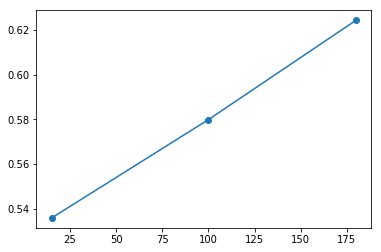

In [19]:
plt.plot(adiposities, adip_means, 'o-')
plt.show()

In [20]:
scales = sorted(scale_metrics)
scale_means = [np.mean(scale_metrics[scale]) for scale in scales]

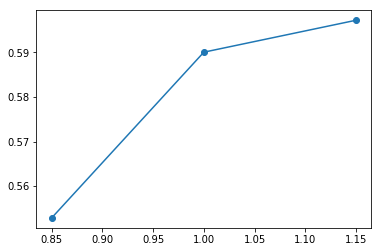

In [21]:
plt.plot(scales, scale_means, 'o-')
plt.show()

## Real data predictions

In [14]:
real_data_file = "../data/realData/FS_1334172_layers.csv"
raw = np.loadtxt(real_data_file, delimiter=";")
real_data = np.transpose(raw)
preds = model.predict(real_data)

In [16]:
np.savetxt("../data/predictions.txt", preds, fmt="%d")